In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
# donwload database from github
!npx degit wfsilva-uea/coari/coari_db.csv coari_db.csv -f

npx: installed 1 in 1.064s
> cloned wfsilva-uea/coari#master to coari_db.csv


# Criação do Banco

In [53]:
# csv structure
names = [
  'Entrevistador', 
  'Idade', 
  'Faixa', 
  'Genero', 
  'Renda', 
  'Bairro', 
  'Quest. 5', 
  'Quest. 6', 
  'Quest. 7', 
  'Quest. 8', 
  'Quest. 9', 
  'Quest. 10', 
  'Quest. 11', 
  'Quest. 12', 
  'Quest. 13', 
  'Quest. 14', 
  'Quest. 15', 
  'Quest. 16', 
  'Quest. 17', 
  'Quest. 18', 
  'Quest. 19', 
  'Quest. 20', 
  'Quest. 21', 
  'Quest. 22'
]

converters = {
  'Idade': lambda v: None if v.strip() == '' else int(v),
  'Renda': lambda v: None if v.strip() == '' else float(v),
}

In [54]:
# read coari data base
df = pd.read_csv('coari_db.csv', names=names, converters=converters, na_filter=False, header=0)
df

,Entrevistador,Idade,Faixa,Genero,Renda,Bairro,Quest. 5,Quest. 6,Quest. 7,Quest. 8,Quest. 9,Quest. 10,Quest. 11,Quest. 12,Quest. 13,Quest. 14,Quest. 15,Quest. 16,Quest. 17,Quest. 18,Quest. 19,Quest. 20,Quest. 21,Quest. 22
0,Wanessa,42,40 a 49,Masculino,1000.0,Urucu,c,b,Ser honesto,Salário,a,a,10,8,0,adail,a,indicado pelo adail,b,sem noção,a,e,Nada mudou,infraestrutura
1,Wanessa,48,40 a 49,Masculino,1800.0,Itamarati,f,a,Ser honesto,Asfalto,a,c,9,8,5,,indeciso,indeciso,,,a,c,Asfaltamento,Nada piorou
2,Wanessa,22,22 a 24,Masculino,2500.0,União,g,b,Ser honesto,Segurança,a,b,7,8,8,Magalhães,c,c,a,ficha suja,a,d,Pagamento em dias,Segurança
3,Wanessa,19,18 a 21,Feminino,1000.0,Itamarati,f,b,Dignidade,Emprego,c,c,9,9,8,Mitouso,b,b,a,Não ajudou a familia,c,e,Pagamento em dias,Saúde
4,Wanessa,34,30 a 39,Feminino,500.0,União,f,a,Dignidade,Emprego,c,a,9,5,1,adail,a,d,b,não fez nada,a,e,Nada mudou,desemprego
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Gabriel,16,16 e 17,Masculino,NaN,Do Pera,a,b,Ser trabalhador,Segurança,a,a,8,7,5,,a,d,b,,a,d,Nada mudou,infraestrutura
457,Gabriel,37,30 a 39,Masculino,700.0,Do Pera,d,d,Compromisso com o povo,Infraestrutura,c,a,10,10,0,,a,indicado pelo adail,b,,a,f,Obras,Nada piorou
458,Gabriel,30,30 a 39,Masculino,1300.0,Do Pera,f,a,Ser honesto,Emprego,a,b,10,8,8,,a,d,b,nao ajuda ninguem,razoável,,Nada mudou,Nada piorou
459,Gabriel,32,30 a 39,Masculino,NaN,Do Pera,c,a,Ser trabalhador,Emprego,c,c,7,8,0,,a,,b,,a,c,Nada mudou,Segurança


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entrevistador  461 non-null    object 
 1   Idade          461 non-null    int64  
 2   Faixa          461 non-null    object 
 3   Genero         461 non-null    object 
 4   Renda          415 non-null    float64
 5   Bairro         461 non-null    object 
 6   Quest. 5       461 non-null    object 
 7   Quest. 6       461 non-null    object 
 8   Quest. 7       461 non-null    object 
 9   Quest. 8       461 non-null    object 
 10  Quest. 9       461 non-null    object 
 11  Quest. 10      461 non-null    object 
 12  Quest. 11      461 non-null    object 
 13  Quest. 12      461 non-null    object 
 14  Quest. 13      461 non-null    object 
 15  Quest. 14      461 non-null    object 
 16  Quest. 15      461 non-null    object 
 17  Quest. 16      461 non-null    object 
 18  Quest. 17 

In [94]:
df_faixa_renda = df.groupby(by=['Faixa'])['Renda'].mean()
df_faixa_renda

Faixa
16 e 17    1387.000000
18 a 21    1204.589041
22 a 24    1101.615385
25 a 29    1307.965517
30 a 39    2953.720430
40 a 49    1659.034483
50 a 59    1368.184211
60 e +     1070.833333
Name: Renda, dtype: float64

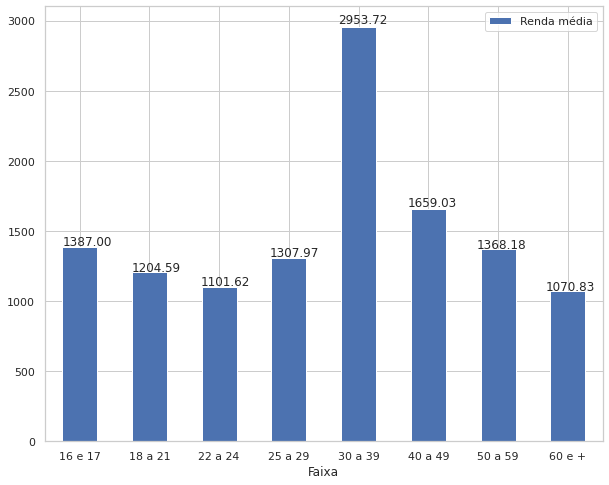

In [92]:
df_faixa_renda_plot = df_faixa_renda.to_frame(name='Renda média')
ax = df_faixa_renda_plot.plot.bar(y='Renda média', rot=0, figsize=(10, 8))
for p in ax.patches:
    ax.annotate('%.2f' % p.get_height(), (p.get_x() * .99, p.get_height() * 1.009))

In [132]:
def _candidate(v):
  return {
    'a': 'Adail',
    'b': 'Mitouso',
    'c': 'Magalhães',
    'd': 'Iran',
    'e': 'Raiso',
    'f': 'Branco/Nulo',
    'g': 'Desconhecido',    
    'h': 'Desconhecido',
  }.get(v, v).upper()

df['Intencao'] = df['Quest. 15'].apply(_candidate)
df_faixa_renda = df.groupby(by=['Faixa', 'Intencao'])['Renda'].mean().to_frame().reset_index()
pd.pivot_table(df_faixa_renda, values='Renda', index='Intencao', columns='Faixa', fill_value='-', margins=True)

Faixa,16 e 17,18 a 21,22 a 24,25 a 29,30 a 39,40 a 49,50 a 59,60 e +,All
Intencao,,,,,,,,,
,1366.67,1033.33,550,400,1790,1255,1200,816.667,1051.46
ADAIL,1070,941.391,740.214,1195.38,4426.07,1070.17,1715.38,816.667,1496.91
BRANCO/NULO,-,980,650,650,1148.75,7433.33,650,610,1731.73
DESCONHECIDO,-,883,-,-,-,-,-,-,883
INDECISO,-,1300,-,5150,1150,1800,475,-,1975
IRAN,500,650,-,500,2000,-,3141,-,1358.2
MAGALHÃES,1943.75,1422.5,1041.67,1344.44,2063.06,1446.88,965.385,1833.33,1507.63
MITOUSO,100,1090,3800,1020,1316.67,2900,2200,906.25,1666.61
RAISO,-,1904,700,908,2000,582.5,1000,975,1152.79


In [ ]:
df_faixa_renda_plot = df_faixa_renda.to_frame(name='Renda média')
ax = df_faixa_renda_plot.plot.bar(y='Renda média', rot=0, figsize=(10, 8))
for p in ax.patches:
    ax.annotate('%.2f' % p.get_height(), (p.get_x() * .99, p.get_height() * 1.009))

# Filtragem do Banco

In [ ]:
nova_data = df[['Idade','Faixa','Bairro','Genero','Quest. 8','Quest. 15']].copy()

# Correções de Label
nova_data.columns = ['Idade','Faixa','Bairro','Genero','Prioridade','Intencao']


# Correções de ABCDEFGH para candidato
nova_data["Intencao"].replace({"a": "Adail", "b": "Mitouso", "c":"Magalhaes", "d":"Iran", "e":"Raiso", "e":"Nulo", "George (Conselho tutelar)":"C.T."}, inplace=True)
# nova_data.info()

# tabela cruzada Prioridade em Coari x Intenção de Voto
tab03=pd.crosstab(nova_data["Prioridade"],nova_data["Intencao"],margins=True)
tab03